## **Import Libraries to use**

In [1]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing import image
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

## **Read Intel Dataset**

https://www.kaggle.com/datasets/puneet6060/intel-image-classification/

In [2]:
train_path = "C:/Users/rowan/Downloads/Natural_Scenes/seg_train"
test_path = "C:/Users/rowan/Downloads/Natural_Scenes/seg_test"

image_category = os.listdir('C:/Users/rowan/Downloads/Natural_Scenes/seg_train')

## **Visualize one image from each class**

In [3]:

def plot_images(image_category):
    
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(image_category):
        image_path = train_path + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_arr = image.img_to_array(img) / 255
        
        plt.subplot(4,4, i+1)
        plt.imshow(img_arr)
        plt.title(category)
        plt.axis('off')
        
    plt.show()  


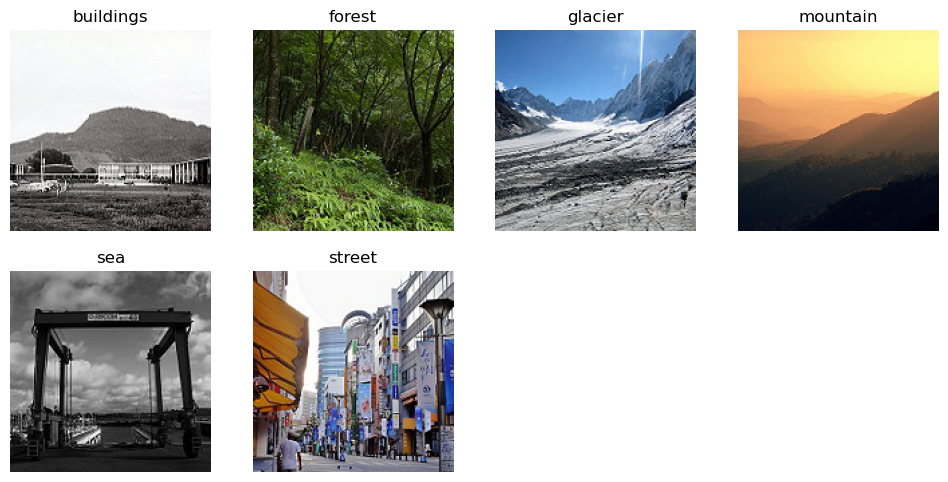

In [4]:
plot_images(image_category)

## **Apply the suitable Image Preprocessing by using ImageDataGenerator**

In [5]:
 #data augmentation

#1- train data
train_generator = ImageDataGenerator(rescale = 1.0/255.0)
train_image_generator = train_generator.flow_from_directory(
                                                train_path,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )
#2- test data
test_generator = ImageDataGenerator(rescale = 1.0/255.0)
test_image_generator = test_generator.flow_from_directory(
                                                test_path,
                                                target_size = (150,150),
                                                batch_size = 32,
                                                class_mode = 'categorical'
                                                )

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


## **CNN Model Building**

In [6]:
#model building
cnn_model = Sequential()

#add layers
cnn_model.add(Conv2D(filters = 32, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu', input_shape = [150,150,3]))

cnn_model.add(MaxPooling2D(pool_size= (2,2)))

cnn_model.add(Conv2D(filters = 64, kernel_size = 3, 
                     padding = 'same', 
                     activation = 'relu'))
cnn_model.add(MaxPooling2D())

#flatten layer
cnn_model.add(Flatten())

#fully connected cnn
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(6, activation = 'softmax'))
#print model summary
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 128)               1

## **Model compiling**

In [7]:
#compile model
cnn_model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = 'accuracy')

## **Model Fitting**

In [8]:
model_history = cnn_model.fit(train_image_generator,
                             epochs = 5,
                             validation_data = test_image_generator,
                             )

Epoch 1/5
439/439 [==============================] - 347s 788ms/step - loss: 0.9034 - accuracy: 0.6675 - val_loss: 0.7319 - val_accuracy: 0.7277
Epoch 2/5
439/439 [==============================] - 375s 854ms/step - loss: 0.5179 - accuracy: 0.8167 - val_loss: 0.6088 - val_accuracy: 0.7887
Epoch 3/5
439/439 [==============================] - 391s 890ms/step - loss: 0.2973 - accuracy: 0.8982 - val_loss: 0.5841 - val_accuracy: 0.8030
Epoch 4/5
439/439 [==============================] - 329s 749ms/step - loss: 0.1477 - accuracy: 0.9501 - val_loss: 0.7223 - val_accuracy: 0.7910
Epoch 5/5
439/439 [==============================] - 316s 720ms/step - loss: 0.0800 - accuracy: 0.9771 - val_loss: 0.8169 - val_accuracy: 0.7970


## **Model Performance Plotting**

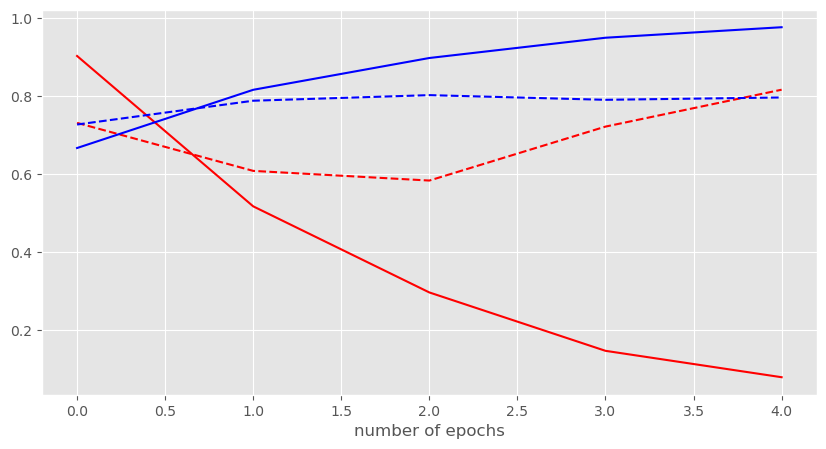

In [9]:
#plot history of loss and accuracy
hist = model_history.history
plt.style.use('ggplot')
plt.figure(figsize = (10,5))

#loss history
plt.plot(hist['loss'], c = 'red', label = 'train loss')
plt.plot(hist['val_loss'], c = 'red', label = 'validation loss', linestyle = '--')

#accuracy history
plt.plot(hist['accuracy'], c = 'blue', label = 'train accuracy')
plt.plot(hist['val_accuracy'], c = 'blue', label = 'validation accuracy', linestyle = '--')


plt.xlabel("number of epochs")
plt.show()


## **Print the test and train accuracy**

In [10]:
#print the test and train accuracy
print("Test accuracy:", model_history.history['val_accuracy'][-1])
print("Train accuracy:", model_history.history['accuracy'][-1])

Test accuracy: 0.796999990940094
Train accuracy: 0.9770557284355164


## **Test your model with an image**

In [24]:
test_image_path = 'C:/Users/rowan/Downloads/Natural_Scenes/seg_pred/seg_pred/225.jpg'

In [25]:
class_map = dict([v,k] for k,v in train_image_generator.class_indices.items())
print(class_map)

{0: 'buildings', 1: 'forest', 2: 'glacier', 3: 'mountain', 4: 'sea', 5: 'street'}


In [26]:
import numpy as np
def predictions(test_image_path, actual_label):
    
    #load and preprocessing image
    test_img = image.load_img(test_image_path, target_size = (150,150))
    test_img_arr = image.img_to_array(test_img)/ 255.0
    test_img_input = test_img_arr.reshape((1, test_img_arr.shape[0], test_img_arr.shape[1] , test_img_arr.shape[2]))
    
    #make prediction
    predicted_label = np.argmax(cnn_model.predict(test_img_input))
    predicted_img = class_map[predicted_label]
    
    
    plt.figure(figsize = (4,4))
    plt.imshow(test_img_arr)
    plt.title("predicted label: {}, actual label : {}".format (predicted_img, actual_label))
    plt.grid()
    plt.axis('off')

1/1 [==============================] - 0s 28ms/step


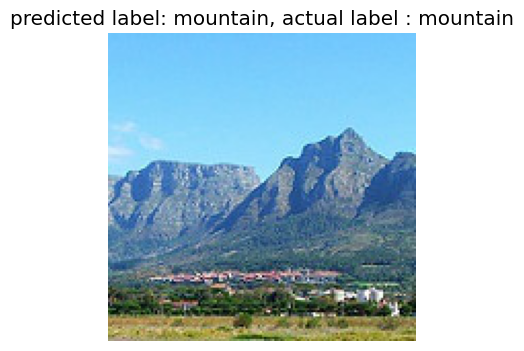

In [28]:
predictions(test_image_path, actual_label = 'mountain')

## **Good Luck!**